In [1]:
# Set up packages
!pip3 install astropy numpy matplotlib aplpy
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
# Reading in a table-formatted file:
#depth=np.genfromtxt('/Users/karleetaylor/desktop/T1M10Rb1.txt',usecols=0)
# drop first row (headings)
#depth = np.delete(depth,0,0)

df = np.loadtxt('/Users/karleetaylor/desktop/T1M10Rb1.txt',delimiter=" ", skiprows=1)
depth=df[:,0]
phase=df[:,5]
T=df[:,6]
P=df[:,7]

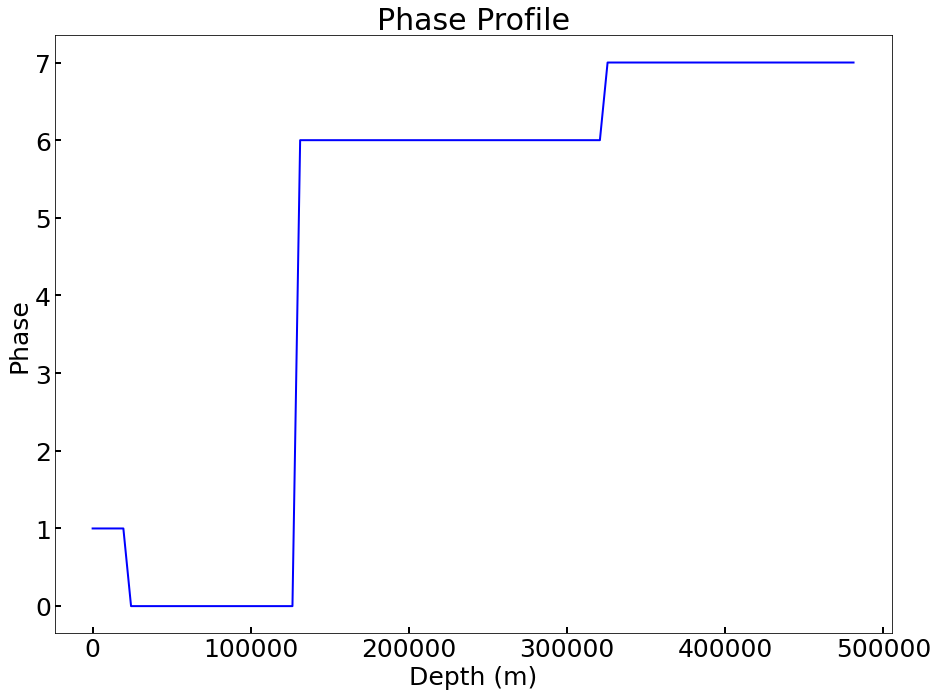

In [29]:
# Graph Phase vs Depth
fig, ax = plt.subplots(figsize=(15, 11))
ax.set_xlabel('Depth (m)', size=25)
ax.set_ylabel('Phase', size=25)
ax.set_title('Phase Profile', size=30)
ax.tick_params(axis='both', labelsize=25)
ax.tick_params(direction='in', length=6, width=2, colors='black')
ax.plot(depth, phase, linewidth=2, color='blue')

In [30]:
# Find inflection points of phase graph --- INCLUDE IN OUTPUT FILE
from numpy import diff

# Find derivatives of graph
x = depth
y = phase
dydx = diff(y)/diff(x)

# Find index of non-zero points
inflection_pts = np.where(dydx != 0) 

# Find x value (depth) that corresponds to index
phase_change = []
for i in inflection_pts:
    inflection_depth = depth[i]
    phase_change.append(inflection_depth)  
    
phase_change = np.append(phase_change, depth[0]) # add top and bottom of hydrosphere
phase_change = np.append(phase_change, depth[99])
phase_change = np.sort(phase_change) # list in ascending order

In [36]:
# Create dictionary with radius (value) and phase name (key)
phase_names_dict={'Water':0,'Ice Ih':1,'Ice II':2, 'Ice III':3,'Ice IV':4,'Ice V':5,'Ice VI':6,'Ice VII':7}
key_list = list(phase_names_dict.keys())
val_list = list(phase_names_dict.values())

data = {}
keys = [] # keys are phase number, then phase name
values = phase_change.tolist() # value is radius/depth

phase_numbers=[]
for i in range(len(phase_change)):
    index = np.where(depth == phase_change[i]) # get index of this depth
    phase_number = phase[index] # get phase of this depth
    phase_numbers.append(phase_number) # create list of keys with phase #
    
for i in range(len(phase_change)):
    position = val_list.index(phase_numbers[i])
    phase_name=key_list[position] # call key from phase_names_dict based on value (phase number)
    keys.append(phase_name)
    
for i in range(len(keys)):
    data[keys[i]] = values[i]
print(data)

phase_names=list(data.keys())

{'Ice Ih': 19441.848460474663, 'Water': 126372.01499308531, 'Ice VI': 320790.4995978319, 'Ice VII': 481185.7493967479}


In [37]:
# GRAPH PLANETARY WEDGE (Bokeh)

# importing the modules
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_file, show
from bokeh.palettes import Category20c
from bokeh.transform import cumsum
from bokeh.models import LabelSet, ColumnDataSource
import pandas as pd

# Creating Graph
graph = figure(title = "Planetary Wedge Graph")

# Starting point for each wedge
x = [0,0,0,0,0]
y = [0,0,0,0,0]
  
# THICKNESS OF LAYERS

r_b=0.6*6.36e+06 #radius of core

# Radius of each wedge (thickness of layers)
radius=[]
for i in range(0,5):
    radius_i = (phase_change[0]-phase_change[i]+r_b)/1000000
    radius.append(radius_i)
  
# start angle of the wedge
start_angle = [1.25,1.25,1.25,1.25,1.25]
  
# end angle of the wedge
end_angle = [1.85,1.85,1.85,1.85,1.85]
        
# name of the y-axis 
graph.yaxis.axis_label = "Depth (1000 km)"

# color value of the wedges
import matplotlib.colors as mcolors
color = ["aqua", "blue", "lightskyblue","lightpink","gray"]
  
# plotting the graph
# Graph all together (but without labels)
graph.wedge(x, y,
            radius = radius,
            start_angle = start_angle,
            color = color,
            end_angle = end_angle)
       
# displaying the model
#show(graph)

GlyphRenderer(id='4259', ...)

In [38]:
# Graph individually, with labels
graph.wedge(x, y,
            radius = radius[0],
            start_angle = start_angle,
            color = color[0],
            end_angle = end_angle,
            legend_label='Ice Ih')

graph.wedge(x, y,
            radius = radius[1],
            start_angle = start_angle,
            color = color[1],
            end_angle = end_angle,
            legend_label='Water')

graph.wedge(x, y,
            radius = radius[2],
            start_angle = start_angle,
            color = color[2],
            end_angle = end_angle,
            legend_label='Ice VI')

graph.wedge(x, y,
            radius = radius[3],
            start_angle = start_angle,
            color = color[3],
            end_angle = end_angle,
            legend_label='Ice VII')

graph.wedge(x, y,
            radius = radius[4],
            start_angle = start_angle,
            color = color[4],
            end_angle = end_angle,
            legend_label='Telluric Silicate/Metal Core')

show(graph)